In [1]:
#importing libraries for data exploration
from PIL import Image
import os
import matplotlib.pyplot as plt

# Path for the data
base_dir = 'processed_images'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Loading images from folders
def load_images_from_folder(folder_path, limit=None):
    images = []
    filenames = os.listdir(folder_path)
    if limit:
        filenames = filenames[:limit]
    for filename in filenames:
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        images.append((filename, img))
    return images

# Load images from each category and split (train and test)
def load_dataset(base_dir, limit=None):
    data = {}
    for split in ['train', 'test']:
        split_dir = os.path.join(base_dir, split)
        data[split] = {}
        for category in ['cataract', 'normal']:
            category_dir = os.path.join(split_dir, category)
            data[split][category] = load_images_from_folder(category_dir, limit)
    return data

# Load images with a limit of 5 images per category for quick exploration
dataset = load_dataset(base_dir, limit=5)


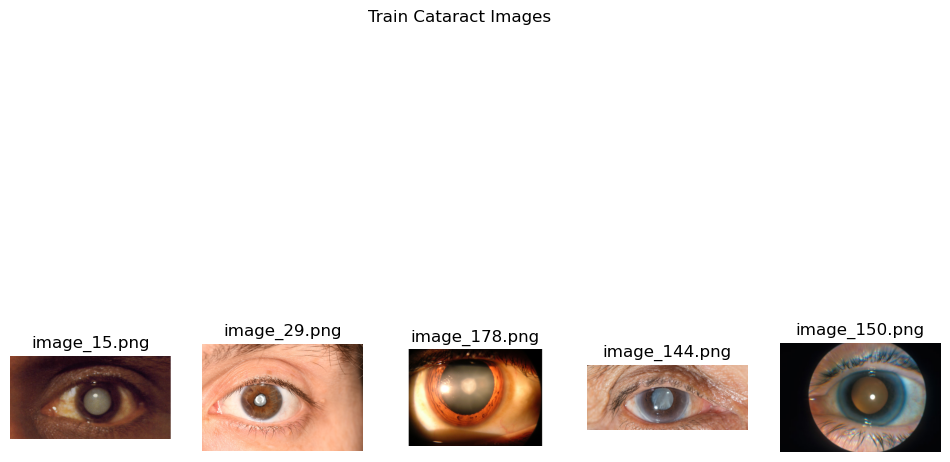

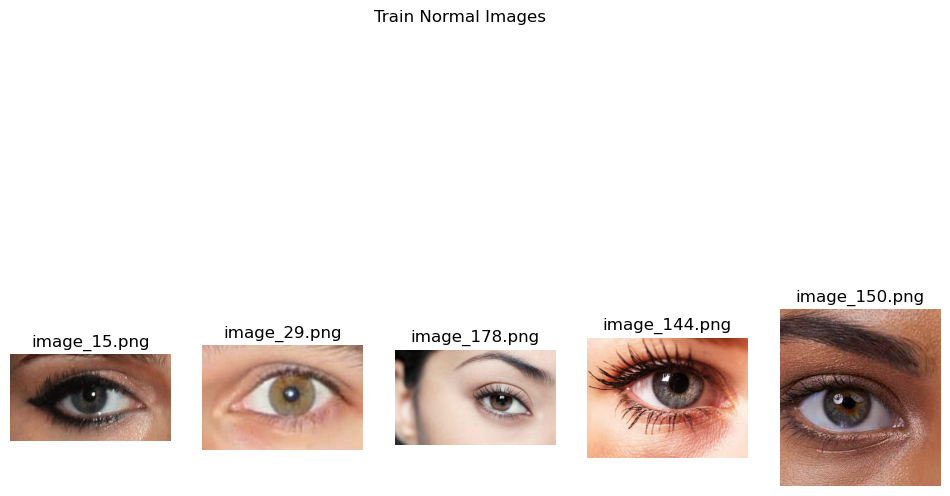

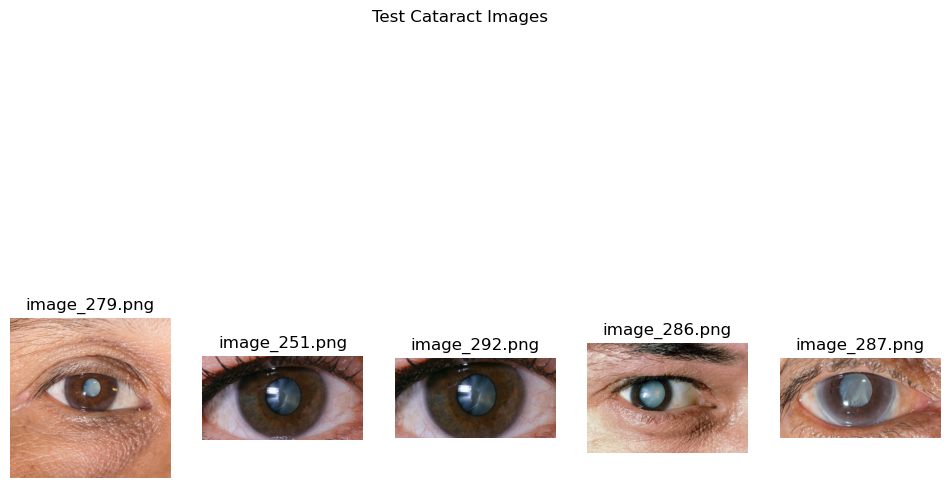

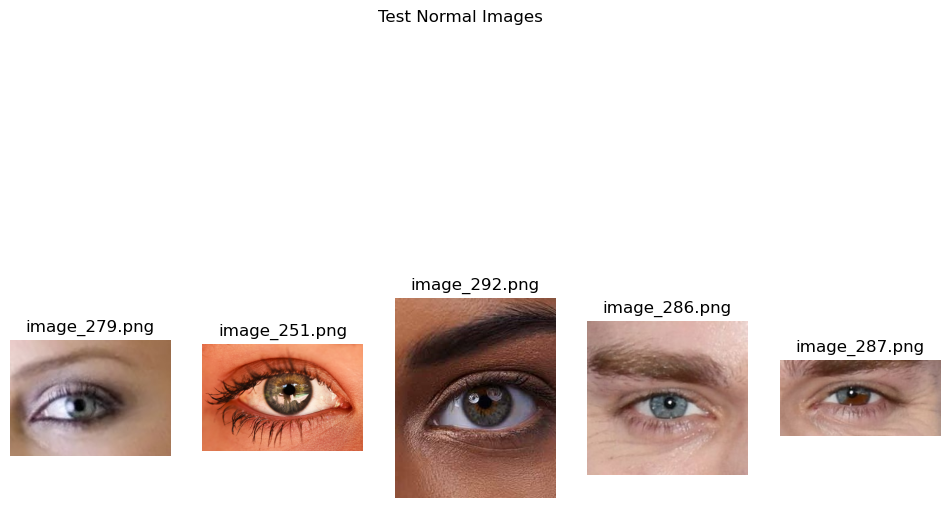

In [2]:
def display_images(images, title):
    plt.figure(figsize=(12, 8))
    for i, (filename, img) in enumerate(images):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img)
        plt.title(filename)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

for split in ['train', 'test']:
    for category in ['cataract', 'normal']:
        display_images(dataset[split][category], f'{split.capitalize()} {category.capitalize()} Images')


In [3]:
import numpy as np

def image_statistics(images):
    sizes = []
    pixel_values = []
    for _, img in images:
        sizes.append(img.size)
        img_array = np.array(img)
        pixel_values.append(img_array.flatten())
    
    sizes = np.array(sizes)
    mean_size = sizes.mean(axis=0)
    size_variance = sizes.var(axis=0)
    all_pixel_values = np.concatenate(pixel_values)
    
    return {
        'mean_size': mean_size,
        'size_variance': size_variance,
        'min_pixel_value': all_pixel_values.min(),
        'max_pixel_value': all_pixel_values.max(),
        'mean_pixel_value': all_pixel_values.mean(),
        'std_pixel_value': all_pixel_values.std()
    }

# Get statistics for each category and split
statistics = {}
for split in ['train', 'test']:
    statistics[split] = {}
    for category in ['cataract', 'normal']:
        statistics[split][category] = image_statistics(dataset[split][category])

print("Image Statistics:")
for split in ['train', 'test']:
    for category in ['cataract', 'normal']:
        print(f"\n{split.capitalize()} - {category.capitalize()}:")
        print(statistics[split][category])


Image Statistics:

Train - Cataract:
{'mean_size': array([902.2, 521. ]), 'size_variance': array([154927.36,  78199.6 ]), 'min_pixel_value': 0, 'max_pixel_value': 255, 'mean_pixel_value': 144.50912700061366, 'std_pixel_value': 70.75826438539434}

Train - Normal:
{'mean_size': array([427.4, 307. ]), 'size_variance': array([43151.04, 25732.8 ]), 'min_pixel_value': 0, 'max_pixel_value': 255, 'mean_pixel_value': 147.34677525648186, 'std_pixel_value': 70.37771085489749}

Test - Cataract:
{'mean_size': array([566.4, 364.8]), 'size_variance': array([18449.04, 17073.76]), 'min_pixel_value': 0, 'max_pixel_value': 255, 'mean_pixel_value': 125.92694138798203, 'std_pixel_value': 58.0096248636098}

Test - Normal:
{'mean_size': array([453.2, 339.8]), 'size_variance': array([192299.36,  80880.56]), 'min_pixel_value': 0, 'max_pixel_value': 255, 'mean_pixel_value': 126.79265486946714, 'std_pixel_value': 67.07792408384192}


In [4]:
def count_images_in_folder(folder_path):
    return len(os.listdir(folder_path))

def count_images(base_dir):
    counts = {}
    for split in ['train', 'test']:
        split_dir = os.path.join(base_dir, split)
        counts[split] = {}
        for category in ['cataract', 'normal']:
            category_dir = os.path.join(split_dir, category)
            counts[split][category] = count_images_in_folder(category_dir)
    return counts

# Count images
image_counts = count_images(base_dir)

print("Class Distribution:")
for split in ['train', 'test']:
    for category in ['cataract', 'normal']:
        print(f"\n{split.capitalize()} - {category.capitalize()}: {image_counts[split][category]} images")


Class Distribution:

Train - Cataract: 245 images

Train - Normal: 246 images

Test - Cataract: 61 images

Test - Normal: 60 images


In [5]:
def check_aspect_ratios(images):
    aspect_ratios = [img.size[0] / img.size[1] for _, img in images]
    return {
        'mean_aspect_ratio': np.mean(aspect_ratios),
        'std_aspect_ratio': np.std(aspect_ratios),
        'min_aspect_ratio': np.min(aspect_ratios),
        'max_aspect_ratio': np.max(aspect_ratios),
    }

aspect_ratios = {}
for split in ['train', 'test']:
    aspect_ratios[split] = {}
    for category in ['cataract', 'normal']:
        aspect_ratios[split][category] = check_aspect_ratios(dataset[split][category])

print("Aspect Ratios:")
for split in ['train', 'test']:
    for category in ['cataract', 'normal']:
        print(f"\n{split.capitalize()} - {category.capitalize()}:")
        print(aspect_ratios[split][category])


Aspect Ratios:

Train - Cataract:
{'mean_aspect_ratio': 1.8067762324479115, 'std_aspect_ratio': 0.36815630880646816, 'min_aspect_ratio': 1.471641791044776, 'max_aspect_ratio': 2.4674698795180725}

Train - Normal:
{'mean_aspect_ratio': 1.462201250293902, 'std_aspect_ratio': 0.3259151703604911, 'min_aspect_ratio': 0.9073482428115016, 'max_aspect_ratio': 1.8511904761904763}

Test - Cataract:
{'mean_aspect_ratio': 1.6713518499649698, 'std_aspect_ratio': 0.39068893575091546, 'min_aspect_ratio': 1.0, 'max_aspect_ratio': 2.00327868852459}

Test - Normal:
{'mean_aspect_ratio': 1.366318577317942, 'std_aspect_ratio': 0.4470660089521988, 'min_aspect_ratio': 0.8005865102639296, 'max_aspect_ratio': 2.1129032258064515}


In [6]:
def analyze_color_channels(images):
    color_channels = {'R': [], 'G': [], 'B': []}
    for _, img in images:
        if img.mode == 'RGB':
            img_array = np.array(img)
            color_channels['R'].append(img_array[:, :, 0].mean())
            color_channels['G'].append(img_array[:, :, 1].mean())
            color_channels['B'].append(img_array[:, :, 2].mean())
    
    return {
        'mean_R': np.mean(color_channels['R']),
        'std_R': np.std(color_channels['R']),
        'mean_G': np.mean(color_channels['G']),
        'std_G': np.std(color_channels['G']),
        'mean_B': np.mean(color_channels['B']),
        'std_B': np.std(color_channels['B']),
    }

color_channels_stats = {}
for split in ['train', 'test']:
    color_channels_stats[split] = {}
    for category in ['cataract', 'normal']:
        color_channels_stats[split][category] = analyze_color_channels(dataset[split][category])

print("Color Channel Statistics:")
for split in ['train', 'test']:
    for category in ['cataract', 'normal']:
        print(f"\n{split.capitalize()} - {category.capitalize()}:")
        print(color_channels_stats[split][category])


Color Channel Statistics:

Train - Cataract:
{'mean_R': 141.55297874814443, 'std_R': 54.99908955630368, 'mean_G': 103.73216082468147, 'std_G': 40.340673643571506, 'mean_B': 85.76438724656857, 'std_B': 31.658350552147336}

Train - Normal:
{'mean_R': 169.4804182896201, 'std_R': 32.41353451209345, 'mean_G': 129.7522113473177, 'std_G': 32.21179639131703, 'mean_B': 113.73724047479413, 'std_B': 30.99338933344454}

Test - Cataract:
{'mean_R': 141.20594429353744, 'std_R': 37.63179795895157, 'mean_G': 109.16524748463996, 'std_G': 25.49861114073565, 'mean_B': 97.58973046374777, 'std_B': 18.495413551223763}

Test - Normal:
{'mean_R': 162.0326819167189, 'std_R': 27.70956243431898, 'mean_G': 116.50113104142432, 'std_G': 23.681463218338763, 'mean_B': 101.16582033535137, 'std_B': 25.70713055050969}


In [7]:
def check_image_quality(images):
    sizes = [img.size for _, img in images]
    size_set = set(sizes)
    
    return {
        'total_images': len(images),
        'unique_sizes': len(size_set),
        'size_distribution': sizes,
    }

image_quality = {}
for split in ['train', 'test']:
    image_quality[split] = {}
    for category in ['cataract', 'normal']:
        image_quality[split][category] = check_image_quality(dataset[split][category])

print("Image Quality Check:")
for split in ['train', 'test']:
    for category in ['cataract', 'normal']:
        print(f"\n{split.capitalize()} - {category.capitalize()}:")
        print(image_quality[split][category])


Image Quality Check:

Train - Cataract:
{'total_images': 5, 'unique_sizes': 5, 'size_distribution': [(594, 308), (1600, 1067), (800, 480), (1024, 415), (493, 335)]}

Train - Normal:
{'total_images': 5, 'unique_sizes': 5, 'size_distribution': [(311, 168), (236, 154), (506, 300), (800, 600), (284, 313)]}

Test - Cataract:
{'total_images': 5, 'unique_sizes': 5, 'size_distribution': [(500, 500), (597, 313), (356, 179), (768, 527), (611, 305)]}

Test - Normal:
{'total_images': 5, 'unique_sizes': 5, 'size_distribution': [(165, 120), (1327, 885), (273, 341), (239, 229), (262, 124)]}


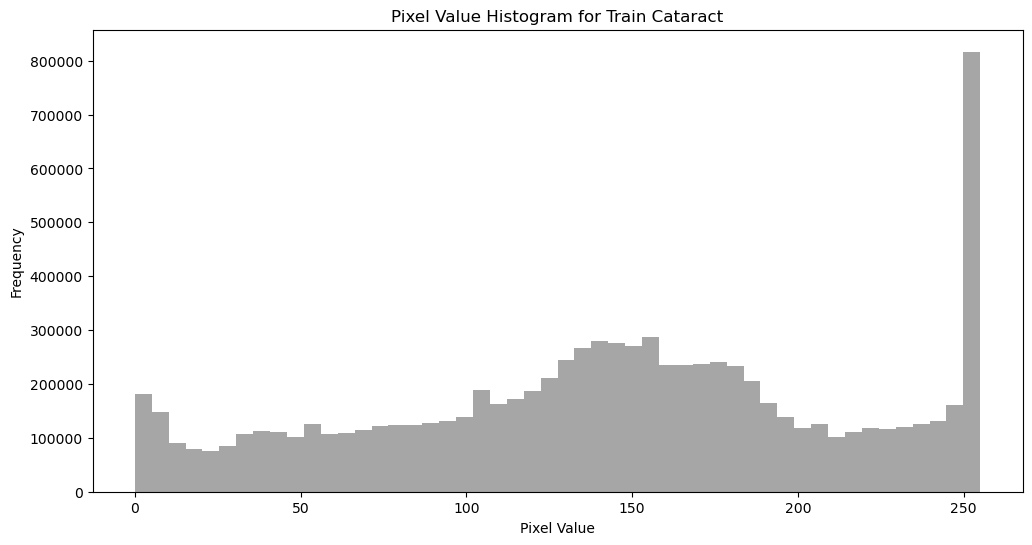

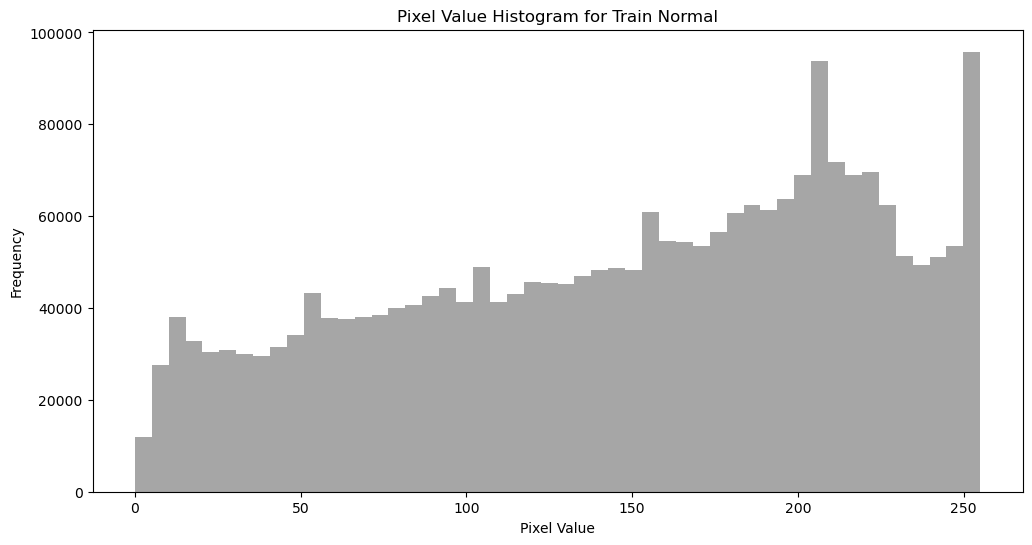

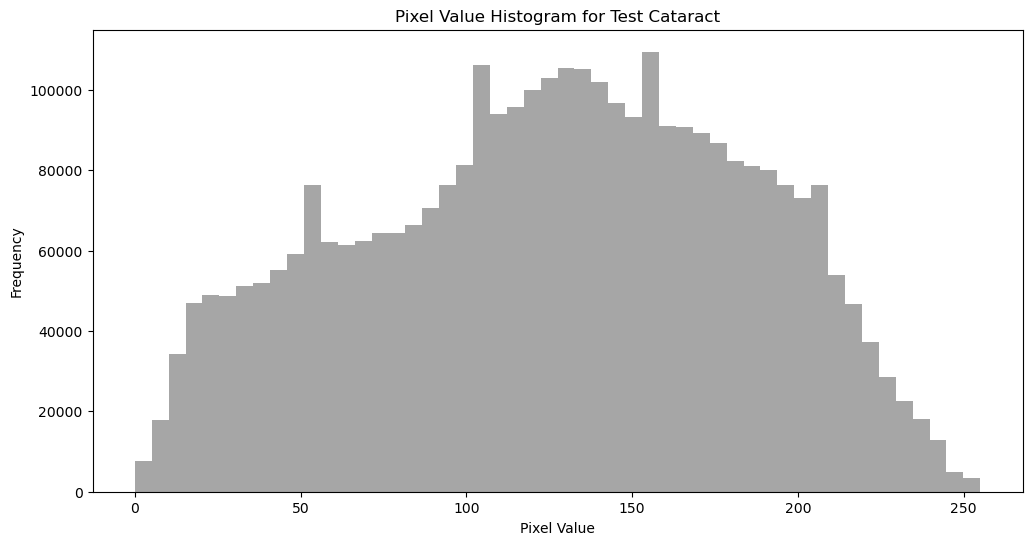

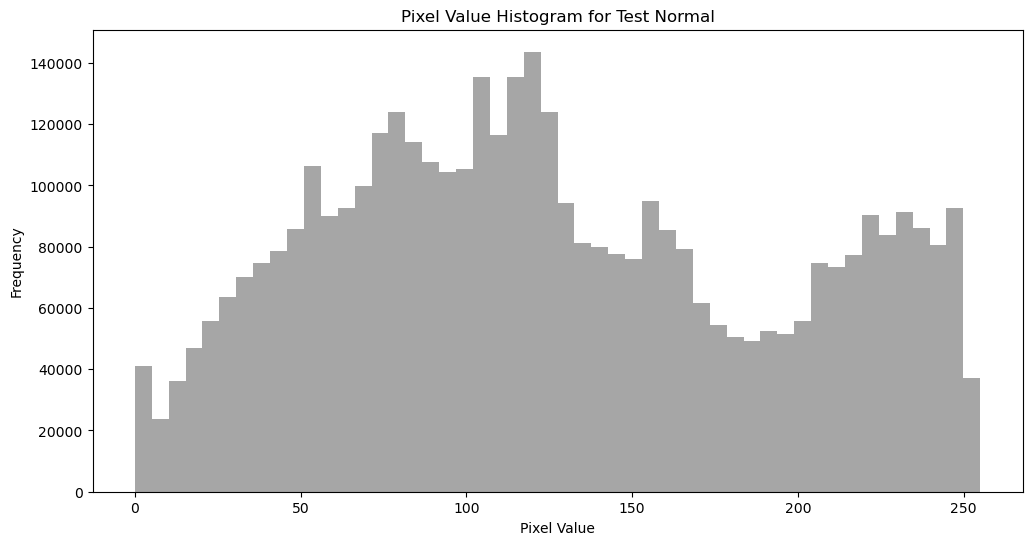

In [8]:
def plot_pixel_histogram(images, category_name):
    all_pixel_values = []
    for _, img in images:
        img_array = np.array(img)
        all_pixel_values.extend(img_array.flatten())
    
    plt.figure(figsize=(12, 6))
    plt.hist(all_pixel_values, bins=50, color='gray', alpha=0.7)
    plt.title(f'Pixel Value Histogram for {category_name}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

for split in ['train', 'test']:
    for category in ['cataract', 'normal']:
        plot_pixel_histogram(dataset[split][category], f'{split.capitalize()} {category.capitalize()}')


In [9]:
def check_image_formats(images):
    formats = [img.format for _, img in images]
    format_counts = {fmt: formats.count(fmt) for fmt in set(formats)}
    return format_counts

image_formats = {}
for split in ['train', 'test']:
    image_formats[split] = {}
    for category in ['cataract', 'normal']:
        image_formats[split][category] = check_image_formats(dataset[split][category])

print("Image Formats:")
for split in ['train', 'test']:
    for category in ['cataract', 'normal']:
        print(f"\n{split.capitalize()} - {category.capitalize()}:")
        print(image_formats[split][category])


Image Formats:

Train - Cataract:
{'PNG': 5}

Train - Normal:
{'PNG': 5}

Test - Cataract:
{'PNG': 5}

Test - Normal:
{'PNG': 5}
